# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [6]:
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [8]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [9]:
F_X_12((1,0))

0.9551328068916008

In [10]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [11]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [12]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [13]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [14]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [15]:
x = np.random.normal(size=100)

In [16]:
np.mean(x)

-0.00471741561829497

In [17]:
g = lambda x: x**2

In [18]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

2.0912906163159772

## Moments etc

In [19]:
import numpy as np
x = np.random.normal(size=100)

In [20]:
x

array([-0.83127322,  0.35904257,  0.16575654, -0.4554634 ,  0.2886667 ,
        0.72306512,  1.68326897, -1.15258914, -0.53532326, -1.21174293,
       -1.60788166, -0.63878652, -1.88759974, -1.56428793, -0.55582417,
       -0.18106679,  0.10206353, -0.47468339, -1.16511548,  0.04713311,
        0.14015967,  0.13366899,  0.68265691, -0.20174322,  0.96039208,
       -2.213731  ,  2.29348136, -0.69996556,  0.8388707 ,  0.1526541 ,
       -0.22104168,  0.77182347, -1.75194737, -0.10768206,  2.26146326,
       -0.40825593,  0.49048466, -0.45047798, -0.60565997, -1.88200977,
        1.88758829,  0.19069636, -2.18390846, -2.04715373,  0.56352593,
        0.1902841 ,  0.25561696,  0.74559659, -0.16759395, -0.71774626,
       -0.40393409,  0.47546592, -0.11315025,  1.24138819,  0.26348585,
        0.53949929,  1.3934296 ,  0.83474483, -0.26930084, -0.44752526,
       -2.49443821, -0.01590716,  1.09972393, -0.50046072, -0.33854022,
        0.0150864 , -2.18816996, -1.51801444, -1.56018868, -1.77

## Sample mean

In [21]:
np.mean(x)

-0.17009967434046722

## Sample variance

In [22]:
np.var(x)

1.0963939422724542

Or by doing it yourself

In [23]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

1.0963939422724542

Higher moments, we can use `scipy`

In [24]:
from scipy.stats import skew, kurtosis

In [25]:
skew(x)

0.030472678047046734

In [26]:
kurtosis(x,fisher=False)

2.937698093478116

## Moments and tail behavior

In [27]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

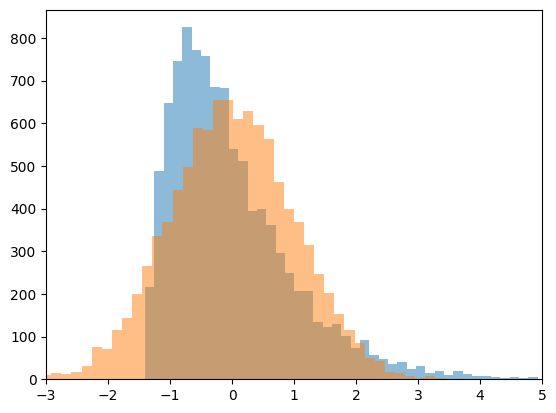

In [28]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [29]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [30]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: -0.01	kurtosis: 3.01


In [30]:
print_basic_stats(standardize(chi2))

mean: 0.00	std: 1.00	skew: 1.40	kurtosis: 5.86


In [31]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.42	kurtosis: 3.07


In [32]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.4077220285877532

In [33]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.703138200833444

## Transformations of random variables

Consider a Binomial random variable

In [34]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

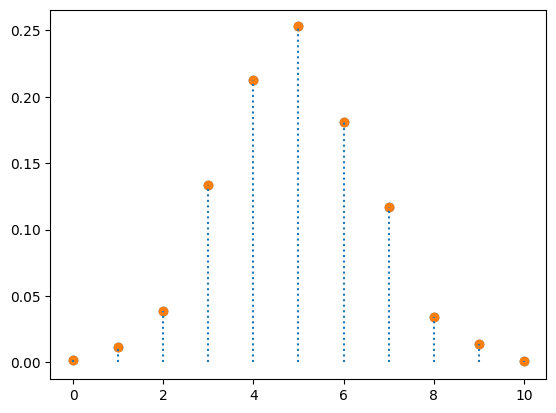

In [40]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF, emfToEdf
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

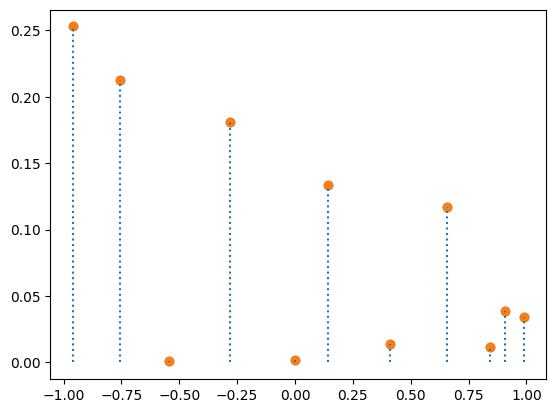

In [36]:
plotEMF(makeEMF(np.sin(x)))

In [ ]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [37]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

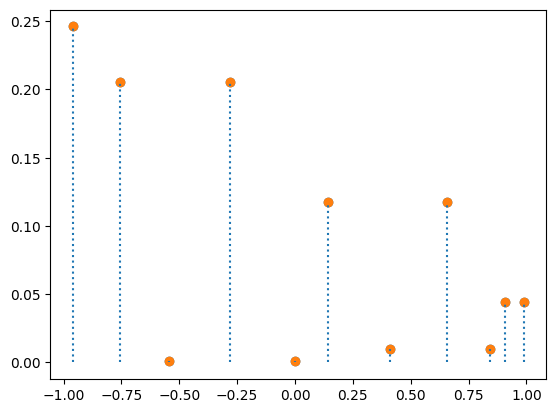

In [38]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

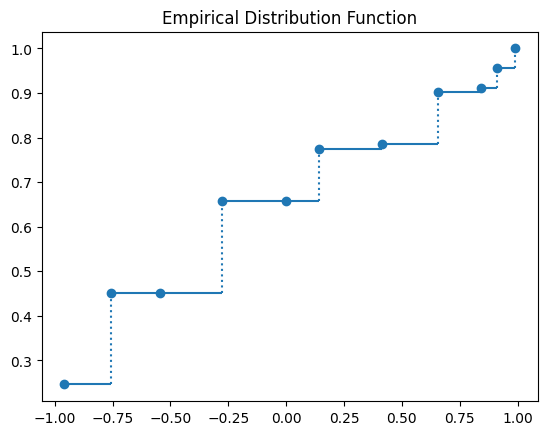

In [41]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

In [74]:
x = np.random.normal(size=1000)
x

array([-8.64317203e-02,  6.39872021e-01, -2.99413752e-01,  1.21066185e+00,
       -6.81446617e-01,  6.84015639e-01, -4.32892251e-01,  1.01496527e+00,
        2.50096510e-01,  1.23065572e+00, -9.31538472e-01,  5.15488175e-01,
        9.69969812e-01, -4.24173797e-01,  7.97806715e-01, -2.46583414e-01,
        1.03345332e+00,  4.47633937e-01, -5.53787828e-02,  2.06057880e-01,
       -3.09354492e-01,  4.75937462e-01, -1.79757920e-01,  2.18924933e-02,
        3.09816714e-01, -3.45420626e-01,  1.18628409e+00,  1.37050906e-01,
       -8.79462304e-01, -6.25078038e-01, -2.06464788e+00, -1.99661092e+00,
       -6.57730903e-01, -5.87389670e-01, -2.75751603e-01, -7.72318900e-01,
        1.63545501e+00, -6.85064945e-01,  2.09554871e-01, -1.28329961e-03,
        4.21949935e-01,  3.38982971e-01,  1.82672653e-01,  3.63419654e-01,
        1.43196736e-01,  4.86566719e-01,  1.05918510e+00, -3.07200851e+00,
       -1.21472255e+00, -5.81011927e-01, -1.46600607e+00, -4.89791190e-01,
       -2.04551087e+00, -

In [75]:
y = np.sin(x)
y

array([-8.63241466e-02,  5.97092785e-01, -2.94960092e-01,  9.35849444e-01,
       -6.29917215e-01,  6.31910397e-01, -4.19498012e-01,  8.49462228e-01,
        2.47497468e-01,  9.42707766e-01, -8.02538743e-01,  4.92959645e-01,
        8.24868648e-01, -4.11567938e-01,  7.15826290e-01, -2.44092149e-01,
        8.59071708e-01,  4.32833804e-01, -5.53504811e-02,  2.04602775e-01,
       -3.04443834e-01,  4.58171924e-01, -1.78791400e-01,  2.18907446e-02,
        3.04884082e-01, -3.38592488e-01,  9.26981508e-01,  1.36622272e-01,
       -7.70396174e-01, -5.85160557e-01, -8.80513678e-01, -9.10702557e-01,
       -6.11322706e-01, -5.54190100e-01, -2.72270222e-01, -6.97798128e-01,
        9.97910355e-01, -6.32723305e-01,  2.08024529e-01, -1.28329926e-03,
        4.09540141e-01,  3.32528111e-01,  1.81658404e-01,  3.55472611e-01,
        1.42707856e-01,  4.67593823e-01,  8.71956809e-01, -6.95280015e-02,
       -9.37272715e-01, -5.48870095e-01, -9.94514523e-01, -4.70441638e-01,
       -8.89423237e-01, -

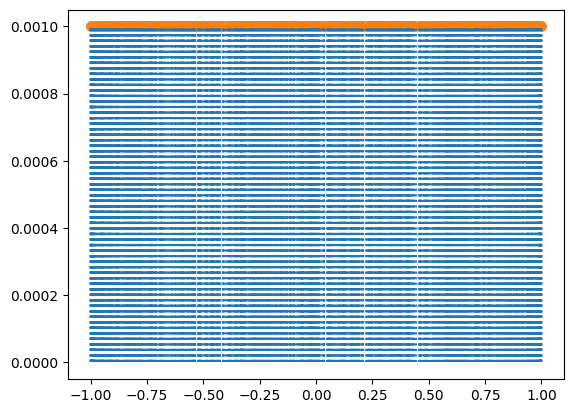

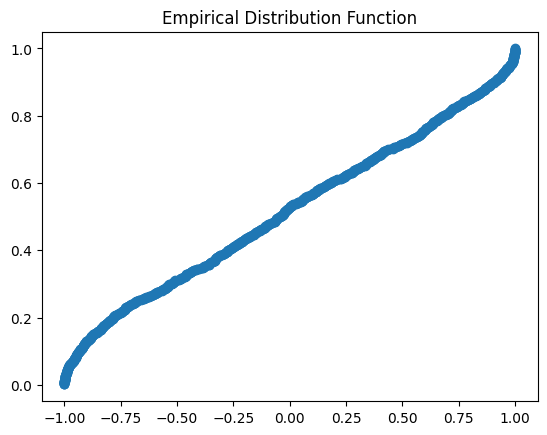

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [72]:
plotEMF(makeEMF(y))
plotEMF(plotEDF(emfToEdf(makeEMF(y))))

(array([74., 30., 34., 27., 20., 22., 13., 15., 21., 19., 14., 21., 17.,
        15., 15., 21., 15., 10., 17., 12., 23., 13., 13., 24., 13., 19.,
        12., 10., 11., 20., 21., 23., 17., 11., 14., 16., 17., 12., 14.,
        19., 16., 17., 14., 11., 17., 32., 20., 28., 29., 62.]),
 array([-9.99962063e-01, -9.59963044e-01, -9.19964025e-01, -8.79965006e-01,
        -8.39965987e-01, -7.99966968e-01, -7.59967949e-01, -7.19968930e-01,
        -6.79969911e-01, -6.39970892e-01, -5.99971873e-01, -5.59972854e-01,
        -5.19973835e-01, -4.79974816e-01, -4.39975797e-01, -3.99976779e-01,
        -3.59977760e-01, -3.19978741e-01, -2.79979722e-01, -2.39980703e-01,
        -1.99981684e-01, -1.59982665e-01, -1.19983646e-01, -7.99846270e-02,
        -3.99856081e-02,  1.34108335e-05,  4.00124298e-02,  8.00114487e-02,
         1.20010468e-01,  1.60009487e-01,  2.00008506e-01,  2.40007524e-01,
         2.80006543e-01,  3.20005562e-01,  3.60004581e-01,  4.00003600e-01,
         4.40002619e-01,  4.8000

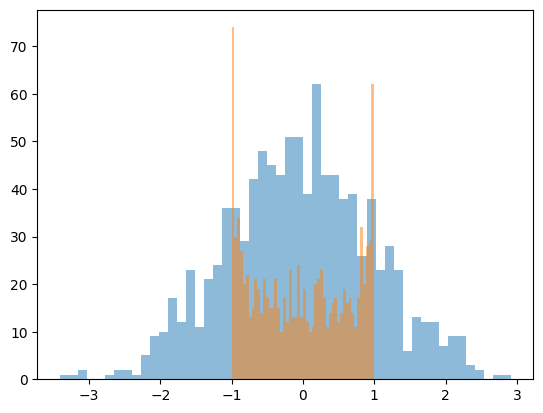

In [76]:
plt.hist(x, bins=50,alpha=0.5)
plt.hist(y, bins=50,alpha=0.5)

In [77]:
np.mean(y)

-0.027357722025717904

In [78]:
np.sqrt(np.var(y))

0.6650609011813339

In [80]:
skew(y)

0.04981723623197573

In [82]:
kurtosis(y)

-1.3762763239773472

In [83]:
kurtosis(x)

-0.14159454450086617